<a href="https://colab.research.google.com/github/Akilesh786/Akilesh786/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install dependencies (if needed, but sklearn & pandas are pre-installed in Colab)
# !pip install scikit-learn pandas openpyxl

# Step 2: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 3: Load dataset (upload file to Colab before running this)
# Example: if it's Excel
df = pd.read_excel("dataframe_brsetmobile ins.csv.xlsx")

# If CSV, then use:
# df = pd.read_csv("dataframe_brsetmobile.csv")

# Step 4: Drop rows with missing values
df = df.dropna()

# Step 5: Define features (X) and target (y)
# Here 'final_icdr' is the target column (change if needed)
X = df.drop(columns=["final_icdr", "file"])  # dropping target + image file name column
y = df["final_icdr"]

# Step 6: Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=["laterality", "final_artifacts", "final_quality", "final_edema"], drop_first=True)


# Step 7: Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9066523605150214

📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       717
         1.0       0.58      0.53      0.55        55
         2.0       0.78      0.71      0.74       112
         3.0       0.78      0.58      0.67        12
         4.0       0.97      0.86      0.91        36

    accuracy                           0.91       932
   macro avg       0.81      0.73      0.77       932
weighted avg       0.90      0.91      0.90       932



In [ ]:
# ========================================
# STEP 1: Import Libraries
# ========================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# SMOTE for oversampling
# Check if imbalanced-learn is installed, if not, install it
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    !pip install imbalanced-learn
    from imblearn.over_sampling import SMOTE

# ========================================
# STEP 2: Load Dataset
# ========================================
# Upload file to Colab before running this line
df = pd.read_excel("dataframe_brsetmobile ins.csv.xlsx")

# Drop rows with missing values
df = df.dropna()

# ========================================
# STEP 3: Features & Target
# ========================================
X = df.drop(columns=["final_icdr", "file"])  # drop target + file column
y = df["final_icdr"]

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=["laterality", "final_artifacts", "final_quality", "final_edema"], drop_first=True)

# Train/Test split (for class_weight version)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================================
# STEP 4: RandomForest with Class Weights
# ========================================
print("⚖️ Random Forest with class_weight='balanced' \n")
model_balanced = RandomForestClassifier(random_state=42, class_weight="balanced")
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))

# ========================================
# STEP 5: SMOTE Oversampling
# ========================================
print("\n⚡ Random Forest with SMOTE Oversampling \n")
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data to avoid data leakage
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Use the original test set for evaluation
X_test_smote, y_test_smote = X_test, y_test


model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test_smote)

print("Accuracy:", accuracy_score(y_test_smote, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_smote))

⚖️ Random Forest with class_weight='balanced' 

Accuracy: 0.9120171673819742

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       717
         1.0       0.59      0.55      0.57        55
         2.0       0.81      0.72      0.76       112
         3.0       0.73      0.67      0.70        12
         4.0       0.97      0.86      0.91        36

    accuracy                           0.91       932
   macro avg       0.81      0.75      0.78       932
weighted avg       0.91      0.91      0.91       932


⚡ Random Forest with SMOTE Oversampling 

Accuracy: 0.9055793991416309

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       717
         1.0       0.55      0.55      0.55        55
         2.0       0.79      0.72      0.76       112
         3.0       0.67      0.67      0.67        12
         4.0       0.97      0.86      0.

final_icdrRequirement already satisfied: seaborn in /usr/local/lib/python3.12/dist-packages (0.13.2)
Upload your Excel file


Saving dataframe_brsetmobile ins.csv.xlsx to dataframe_brsetmobile ins.csv (4).xlsx
First 5 rows:
    patient  age  sex  dm_time  insulin  oraltreatment_dm  \
0        1   58    1     15.0      1.0               1.0   
1        1   58    1     15.0      1.0               1.0   
2        1   58    1     15.0      1.0               1.0   
3        1   58    1     15.0      1.0               1.0   
4       10   63    0      7.0      0.0               1.0   

   systemic_hypertension  insurance  educational_level  alcohol_consumption  \
0                    1.0        0.0                3.0                  1.0   
1                    1.0        0.0                3.0                  1.0   
2                    1.0        0.0                3.0                  1.0   
3                    1.0        0.0                3.0                  1.0   
4                    1.0        0.0                2.0                  0.0   

   ...  acute_myocardial_infarction  nephropathy  neuropathy  dia

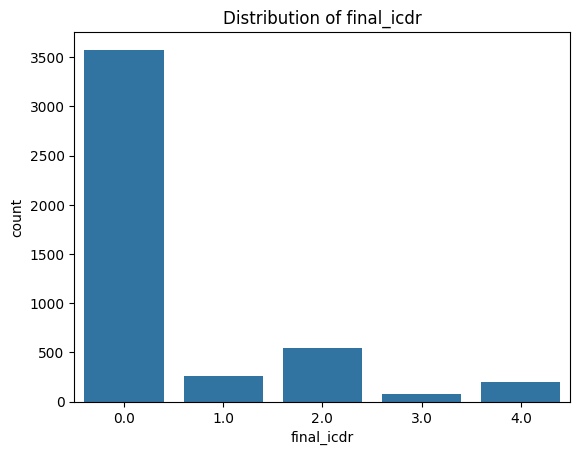

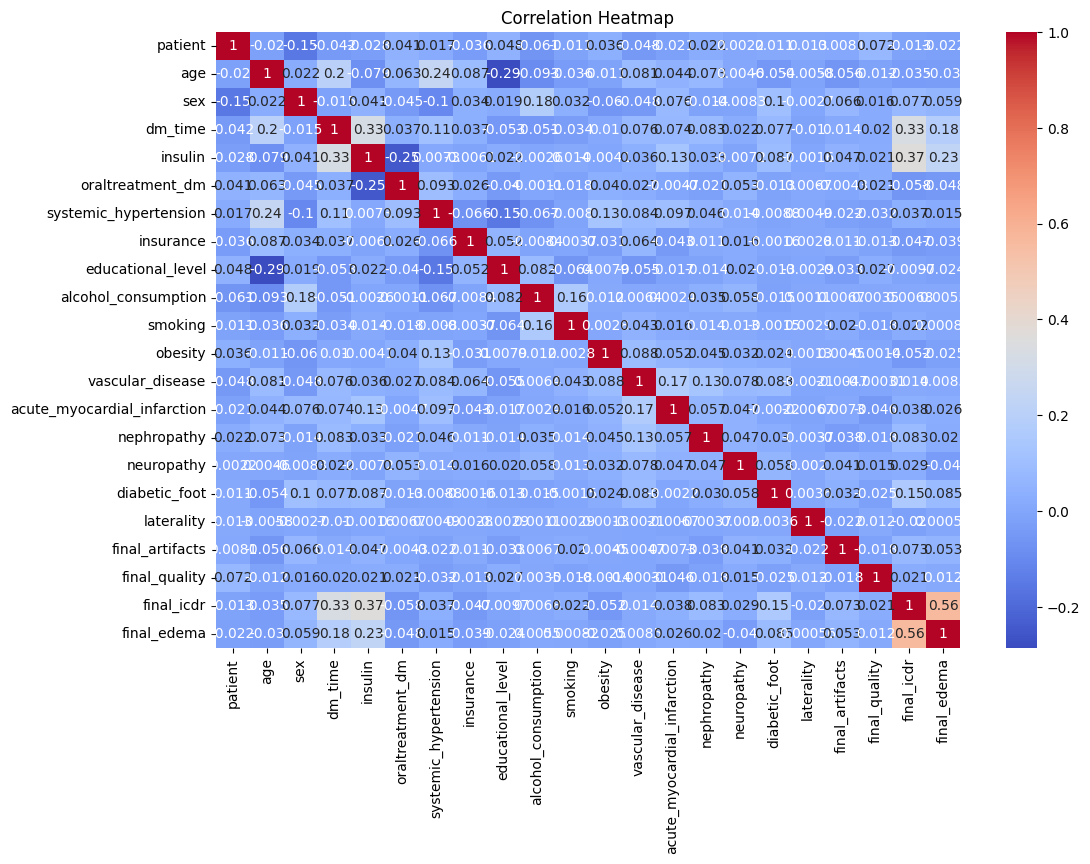


Data split into training and testing sets.
RandomForest trained successfully
SVM trained successfully


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained successfully

--- RandomForest ---
Accuracy: 0.9034334763948498
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       717
         1.0       0.56      0.49      0.52        55
         2.0       0.79      0.71      0.75       112
         3.0       0.78      0.58      0.67        12
         4.0       0.97      0.81      0.88        36

    accuracy                           0.90       932
   macro avg       0.81      0.71      0.76       932
weighted avg       0.90      0.90      0.90       932



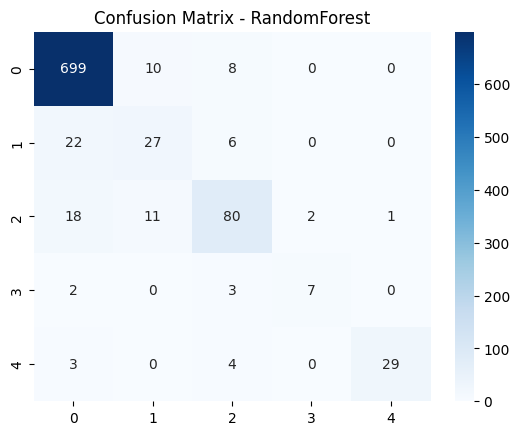


--- SVM ---
Accuracy: 0.76931330472103
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       717
         1.0       0.00      0.00      0.00        55
         2.0       0.00      0.00      0.00       112
         3.0       0.00      0.00      0.00        12
         4.0       0.00      0.00      0.00        36

    accuracy                           0.77       932
   macro avg       0.15      0.20      0.17       932
weighted avg       0.59      0.77      0.67       932



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


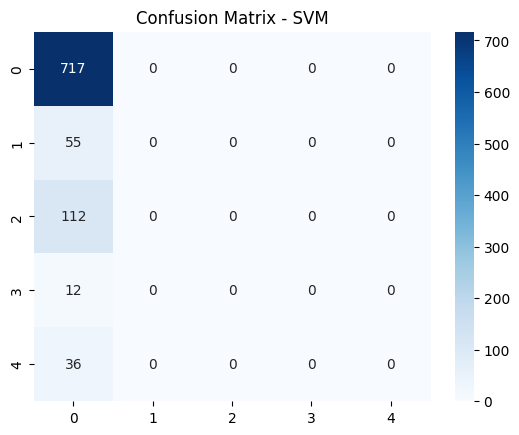


--- LogisticRegression ---
Accuracy: 0.8186695278969958
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       717
         1.0       0.00      0.00      0.00        55
         2.0       0.67      0.45      0.53       112
         3.0       0.00      0.00      0.00        12
         4.0       0.23      0.08      0.12        36

    accuracy                           0.82       932
   macro avg       0.35      0.30      0.31       932
weighted avg       0.74      0.82      0.77       932



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


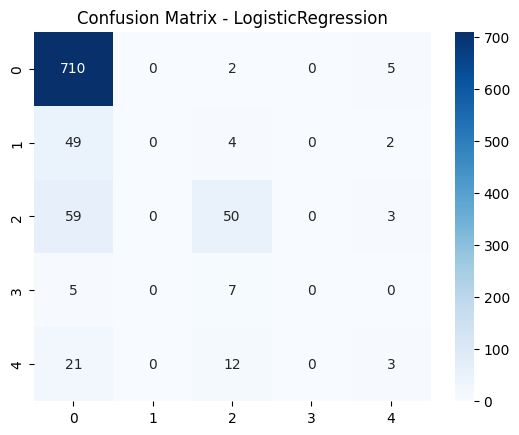

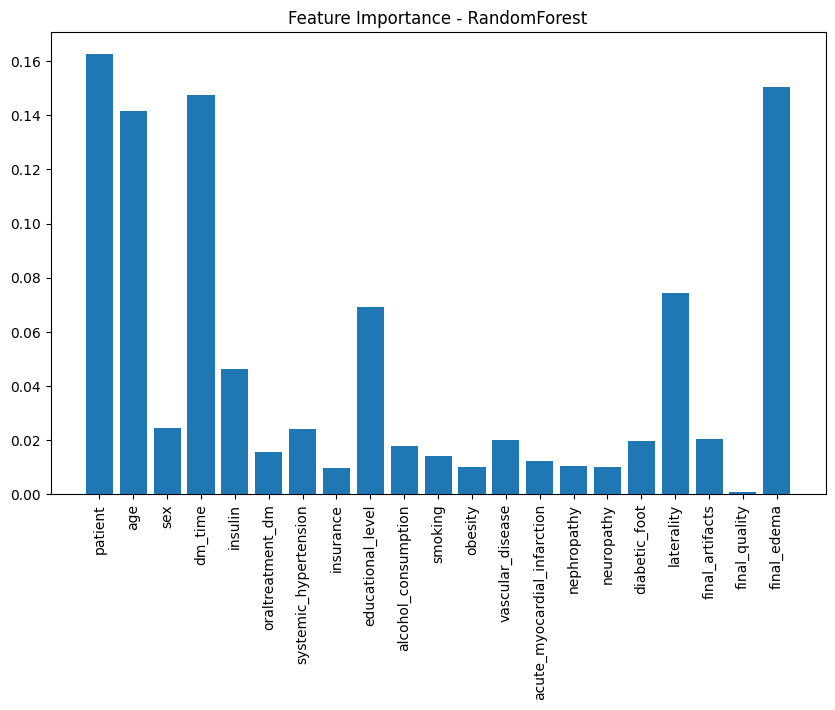

RandomForest model saved as 'final_model.pkl'


In [ ]:
# ================================
# FULL ML PROJECT WORKFLOW TEMPLATE
# ================================

# Step 0: Install required libraries
!pip install seaborn scikit-learn matplotlib openpyxl

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import joblib
from google.colab import files

# Step 2: Upload and load dataset
print("Upload your Excel file")
uploaded = files.upload()
# Assuming only one file is uploaded, get the filename
file_name = next(iter(uploaded))
df = pd.read_excel(file_name)

# Step 3: Inspect dataset
print("First 5 rows:\n", df.head())
print("\nData Info:")
print(df.info())
print("\nStatistics:\n", df.describe())

# Step 4: Handle missing values
df_clean = df.dropna().copy() # Add .copy() to avoid SettingWithCopyWarning
print("\nAfter cleaning, data info:")
print(df_clean.info())

# Step 5: Encode categorical variables
le = LabelEncoder()
for col in df_clean.select_dtypes(include='object').columns:
    if col != 'file': # Exclude the 'file' column from encoding
        df_clean[col] = le.fit_transform(df_clean[col])
print("\nCategorical columns encoded.")

# Step 6: EDA - Distribution and correlation
target_col = input("Enter the target column name: ")

# Distribution plot
sns.countplot(x=target_col, data=df_clean)
plt.title(f"Distribution of {target_col}")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
# Exclude non-numeric columns for correlation heatmap
numeric_cols = df_clean.select_dtypes(include=np.number).columns
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 7: Split dataset
X = df_clean.drop([target_col, 'file'], axis=1) # Drop the 'file' column from features
y = df_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")

# Step 8: Train multiple models
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully")

# Step 9: Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve for binary classification
    if len(y.unique()) == 2:
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} ROC')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()

# Step 10: Feature importance (for RandomForest)
rf_model = models['RandomForest']
importances = rf_model.feature_importances_
plt.figure(figsize=(10,6))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.title('Feature Importance - RandomForest')
plt.show()

# Step 11: Save final model
joblib.dump(rf_model, 'final_model.pkl')
print("RandomForest model saved as 'final_model.pkl'")